In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.metrics import confusion_matrix

df = pd.read_csv('andSVM_2.csv')

x = np.asarray(df)[:,0:2]
y = np.asarray(df)[:,-1]

df

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


# Perceptron


In [103]:
# Model(X)
def V(w,X):
    return X.dot(w[1:]) +w[0] 

In [104]:
#Adjusting the weights
def adjust(X,y,w,eta): 
    for i in range(len(X)):
        error=y[i]-g(w,X[i])
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])
    return w

In [105]:
# Transfer function
def g(w,X):
    if (V(w,X) > 0):
        return 1
    else:
        return 0

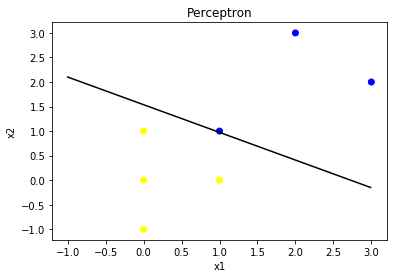

In [106]:
w0 = rnd.random()
w=np.asarray([rnd.random() for i in range(1+len(x[0]))])
eta = 0.05
# Training
for i in range(len(w)):
    w=adjust(x,y,w,eta)
  
# Dots of the decision boundary line
x1 = 0
y1 = -w[0]/w[2]
x2 = -w[0]/w[1]
y2 = 0
k = (y1 - y2) / (x1 - x2)
b = y2 - k*x2
def boundary (x):
    return k*x + b

m = np.arange(-1, 3, 0.01)


# Visualize data
plt.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'yellow' for i in y])
plt.plot(m, boundary(m), color = 'black')
plt.title("Perceptron")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# SVM

## C=1

In [107]:
C=1
classifier = SVC(kernel = 'linear', C=C)
classifier.fit(x, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

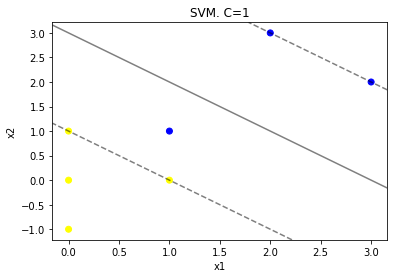

In [108]:
plt.title("SVM. C=1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'yellow' for i in y])

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

## C=100

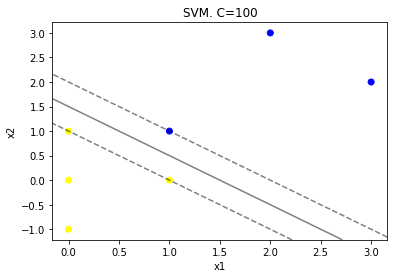

In [109]:
C=100
classifier = SVC(kernel = 'linear', C=C)
classifier.fit(x, y)

plt.title("SVM. C=100")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x[:,0],x[:,1],color=['blue' if i==1 else 'yellow' for i in y])

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

# Circle

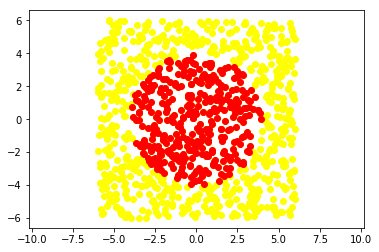

In [110]:
n=1000
#create a circle
x1 = np.array([np.random.uniform(-6,6) for i in range(n)])
x2 = np.array([np.random.uniform(-6,6) for i in range(n)])

circle=pd.DataFrame(x1,columns=['x1'])
circle['x2']=x2 
circle['x1^2']=circle['x1']**2
circle['x2^2']=circle['x1']**2
circle['y']=(circle['x1']**2+circle['x2']**2).apply(lambda x: 1 if x<=16 else 0)

plt.scatter(circle['x1'],circle['x2'],color='yellow')
plt.scatter(circle[circle['y']==1]['x1'],circle[circle['y']==1]['x2'],color='red')
plt.axis("equal")
plt.show()

#true circle
fig=plt.figure(1)
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0,0), radius=4, color='black', fill=False)
ax.add_patch(circ)

X=np.asarray(circle[['x1','x2']]) 
Y=np.asarray(circle[['y']])

## Neural net

In [111]:
input_size=2
hidden_layer_size=4
middle_layer_size=4
output_layer_size=1
x = tf.placeholder(tf.float32,shape=[None,input_size])
y = tf.placeholder(tf.float32,shape=[None,output_layer_size])

W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_layer_size], -1, 1))
b_layer1 = tf.Variable(tf.zeros([middle_layer_size]))

W_layer2 = tf.Variable(tf.random_uniform([hidden_layer_size,output_layer_size], -1, 1))
b_layer2 = tf.Variable(tf.zeros([output_layer_size]))

hidden_1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1)
predict = tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2)
lossfn = tf.reduce_mean(( (y * tf.log(predict) + ((1 - y) * tf.log(1.0 - predict)) ) * -1))

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

0.628


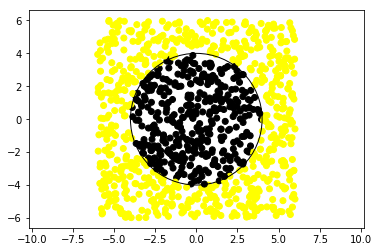

In [112]:
for i in range(5000):
    sess.run(optimizer, feed_dict={x: X, y: Y})
    
correct_prediction = tf.equal(tf.round(predict),y) 

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))    

prediction = sess.run(predict,feed_dict={x:X})

z=[]
for i in range (n):
    if prediction[i]>=0.5 and Y[i]==1:
        z.append(1)
    else: 
        if prediction[i]<0.5 and Y[i]==0:
            z.append(0)
        else:
             z.append(2)   
                
plt.scatter(X[:,0],X[:,1],color=['red' if z==1 else 'yellow' if z==0 else 'black' for z in z])
plt.axis("equal")
plt.show()
#black dots are misclassified

In [113]:
#confusion matrix
TP = 0
FN = 0
FP = 0
TN = 0 
for i in range (n):
    if prediction[i]>=0.5 and Y[i]==1:
        TP = TP + 1
    if prediction[i]<0.5 and Y[i]==0:
        TN = TN + 1
    if prediction[i]<0.5 and Y[i]==1:
        FN = FN + 1
    if prediction[i]>0.5 and Y[i]==0:
        FP = FP + 1
cm = [[TP, FN], [FP, TN]]     
print cm

[[0, 372], [0, 628]]


## SVM

In [114]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X, Y)
prediction = classifier.predict(X)

print np.mean(prediction==Y.T)

0.993


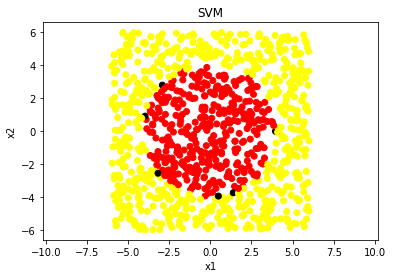

In [115]:
plt.title("SVM")
plt.xlabel("x1")
plt.ylabel("x2")
#plt.scatter(X[:,0],X[:,1],color=['red' if z==1 else 'yellow' if z==0 else 'black' for z in Y])

z=[]
for i in range (n):
    if prediction[i]>=0.5 and Y[i]==1:
        z.append(1)
    else: 
        if prediction[i]<0.5 and Y[i]==0:
            z.append(0)
        else:
             z.append(2)   
                
plt.scatter(X[:,0],X[:,1],color=['red' if z==1 else 'yellow' if z==0 else 'black' for z in z])
plt.axis("equal")
plt.show()

In [116]:
confusion_matrix(Y, prediction)

array([[624,   4],
       [  3, 369]])